In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=4
paper='1106.6060'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let's break down this Hamiltonian and convert it into a `HartreeFockHamiltonian` class in Python.

First, I need to analyze the equation to identify dimensions and basis order.

The equation describes a system with $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$, which appears to be a 3-component vector of creation operators. The subscript $s$ seems to indicate spin, which typically has two values (up and down). And $\kk$ represents momentum.

Looking at the Hamiltonian matrix $\HH_{\kk s}$, it's a 3x3 matrix, where each element maps to interactions between the three orbital types: $p_x$, $p_y$, and $d$.

So the flavors here are:
1. Spin (s): up and down (2 values)
2. Orbital: $p_x$, $p_y$, and $d$ (3 values)

Therefore, D = (2, 3)

Now, let's understand the basis order:
- The first index (0) corresponds to spin: 0 for up, 1 for down.
- The second index (1) corresponds to the orbi

In [7]:
print(generated_code['thinking'])

Let's break down this Hamiltonian and convert it into a `HartreeFockHamiltonian` class in Python.

First, I need to analyze the equation to identify dimensions and basis order.

The equation describes a system with $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$, which appears to be a 3-component vector of creation operators. The subscript $s$ seems to indicate spin, which typically has two values (up and down). And $\kk$ represents momentum.

Looking at the Hamiltonian matrix $\HH_{\kk s}$, it's a 3x3 matrix, where each element maps to interactions between the three orbital types: $p_x$, $p_y$, and $d$.

So the flavors here are:
1. Spin (s): up and down (2 values)
2. Orbital: $p_x$, $p_y$, and $d$ (3 values)

Therefore, D = (2, 3)

Now, let's understand the basis order:
- The first index (0) corresponds to spin: 0 for up, 1 for down.
- The second index (1) corresponds to the orbitals: 0 for $p_x$, 1 for $p_y$, 2 for $d$.

Next, I n

In [8]:
print(generated_code['text'])

# Analysis of the Hamiltonian and Class Implementation

## QUESTION 1: Dimension and Basis Order

Looking at the Hamiltonian, I can see that $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$ represents a 3-component vector of creation operators where:
- $s$ is the spin index (up, down)
- The components represent different orbitals: $p_x$, $p_y$, and $d$

Tuple of Flavors (D) = (2, 3)
Basis Order:
0: spin. Order: up (0), down (1)
1: orbital. Order: p_x (0), p_y (1), d (2)

## QUESTION 2: Identifying Interacting Terms

EXP-VAL DEPENDENT TERMS: {
    "n^p": "Total density of holes on oxygen sites: np.real(exp_val[0, 0, 0, 0, :].mean() + exp_val[1, 0, 1, 0, :].mean() + exp_val[0, 1, 0, 1, :].mean() + exp_val[1, 1, 1, 1, :].mean())",
    "eta": "Nematic order parameter: np.real((exp_val[0, 0, 0, 0, :].mean() + exp_val[1, 0, 1, 0, :].mean()) - (exp_val[0, 1, 0, 1, :].mean() + exp_val[1, 1, 1, 1, :].mean()))",
    "n": "Total density of hole

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
  """
  Hartree-Fock Hamiltonian for a system with p_x, p_y, and d orbitals.
  
  Args:
    N_shell (int): Number of shells in the first Brillouin zone.
    parameters (dict): Dictionary containing model parameters.
      - t_pd (float): Hopping parameter between p and d orbitals.
      - t_pp (float): Hopping parameter between p orbitals.
      - Delta (float): Energy difference between p and d orbitals.
      - U_p (float): Coulomb repulsion on p orbitals.
      - V_pp (float): Inter-site Coulomb repulsion between p orbitals.
      - U_d (float): Coulomb repulsion on d orbital.
      - V_pd (float): Inter-site Coulomb repulsion between p and d orbitals.
      - T (float): Temperature (default: 0).
      - a (float): Lattice constant (default: 1.0).
    filling_factor (float): Filling factor (default: 0.5).
  """
  def __init__(self, N_shell: int, parameters: dict[str, Any]={'t_pd':1.0, 't_pp':1.

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_1106_6060_4.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

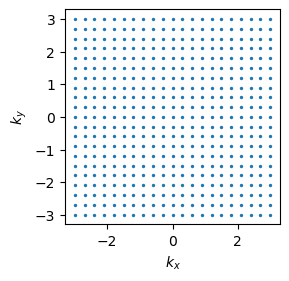

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,parameters={'Delta':0,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

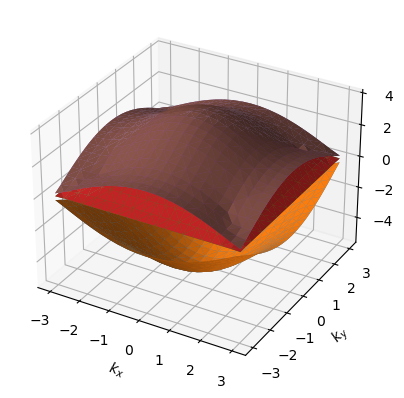

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

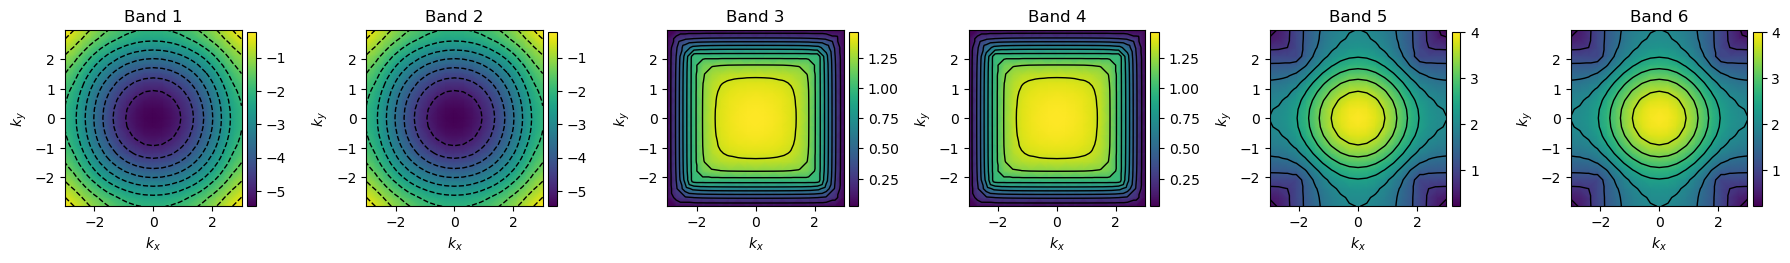

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  
parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [25]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 4


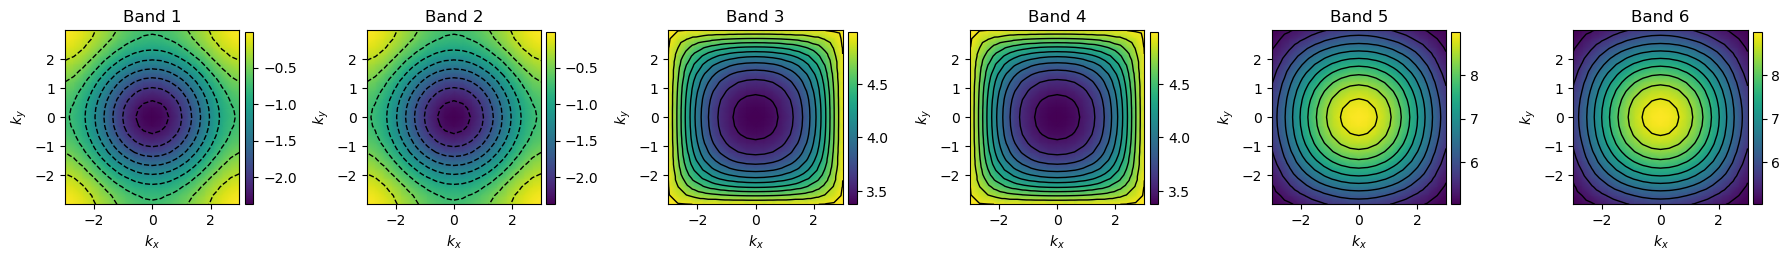

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [28]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[:,2,:,2,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 2


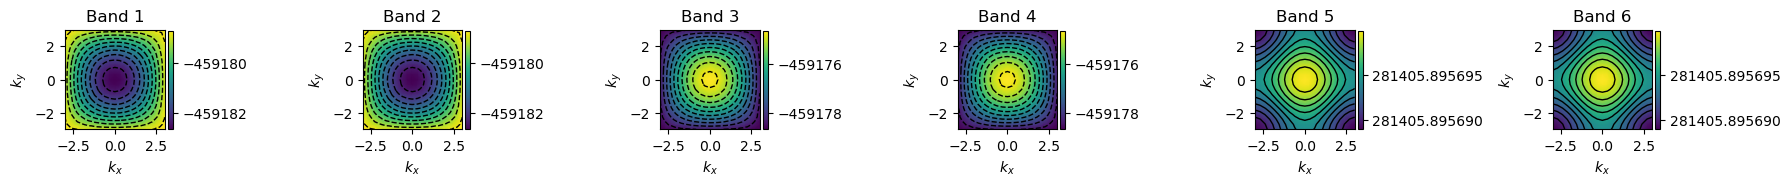

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is 0.04
U/T is 57081.40
mean_U is 26466.87


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image and check if it meets the criteria in the rubric.

The image shows a 2D grid of points in the (k_x, k_y) plane, representing a momentum space mesh. The points are arranged in a square grid, with k_x and k_y values ranging from approximately -3 to 3.

The rubric asks me to check:
1. If this shows a momentum space mesh in the first Brillouin zone of the concerned problem
2. The point group symmetry

First, let's understand what the first Brillouin zone should be for this problem. The problem specifies a square lattice. For a square lattice, the first Brillouin zone is a square in k-space, typically centered at the origin, with boundaries at k_x, k_y = ±π (in units where the lattice constant a = 1).

Looking at the image:
- It shows a square region of k-space centered at the origin
- The range appears to be from -3 to 3 in both k_x and k_y directions
- The mesh points are arranged in a regular grid

Now regardin

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the band structure plot according to the rubric:

1. Identify the shape of the Brillouin zone boundary:
Looking at all the plots (Bands 1-6), I can see that they are all displayed on a square grid with x and y axes labeled as k_x and k_y, ranging approximately from -3 to 3. This is consistent with the first Brillouin zone of a square lattice, which should be square-shaped in reciprocal space.

2. Examine the symmetry of the energy distribution:

2.1 Highest energy regions (yellow):
- Bands 1 & 2: The highest energy regions (yellow-green) are at the corners and edges of the zone, with lowest energy (purple) at the center.
- Bands 3 & 4: The highest energy regions (yellow) are square-shaped in the center.
- Bands 5 & 6: The highest energy regions (yellow) are in the center.

2.2 Pattern of energy variation:
- Bands 1 & 2: Concentric contours decreasing from the edges to the center.
- Bands 3 & 4: Square/rectangular conto

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper)
    )


#################### THINKING ####################

I need to analyze the false color plots for interacting-renormalized band structure in the image and determine whether these plots match what would be expected for a square lattice with infinitesimal interactions using the Hartree-Fock method. Let me go through each point in the rubric.

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a square lattice.

Looking at the plots, I can see that the Brillouin zone is represented as a square in the k-space, with k_x and k_y axes ranging from approximately -2 to 2. This is indeed the expected shape for a square lattice, where the first Brillouin zone is a square in reciprocal space.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow)
- For Bands 1 and 2: The highest energy regions (yellow) appear at the corners of the Brillouin zone.
- For Bands 3 and 

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='4*V_pd = 4e5')
    )


#################### THINKING ####################

Let me analyze the image systematically according to the rubric provided:

1. Brillouin zone boundary shape:
   - The image shows six panels labeled Band 1 through Band 6, each displaying a square-shaped Brillouin zone with k_x and k_y axes ranging from approximately -2.5 to 2.5.
   - This is consistent with the expected square lattice Brillouin zone shape mentioned in the problem.

2. Symmetry of the energy distribution:

   2.1 Highest energy regions (yellow):
   - In Bands 1 and 2: The highest energy appears to be at the corners (dark blue/purple)
   - In Bands 3 and 4: There appears to be some yellow at the center
   - In Bands 5 and 6: The highest energy (yellow) is clearly at the center of the Brillouin zone

   2.2 Pattern of energy variation:
   - Bands 1 and 2 show concentric patterns with the lowest energy at the center
   - Bands 3 and 4 show different patterns with higher energy at the center
   - Bands 5 and 6 show clear

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '4' saved to final_answer.yaml
